<a href="https://colab.research.google.com/github/natalyq1/Machine_learning1/blob/master/Clasificacion_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la clasificación:
Ejercicios para entender como funcionan algunos algoritmos de clasificación



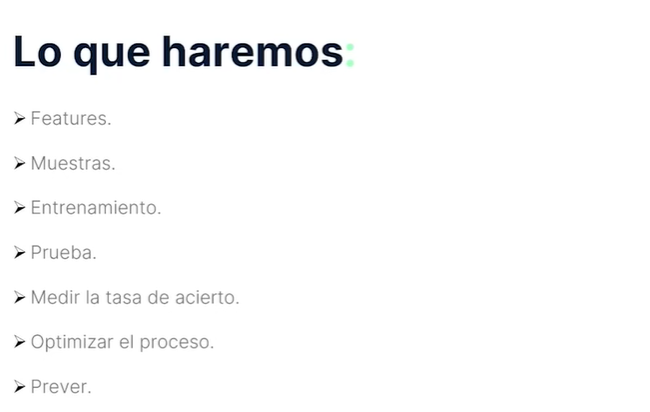

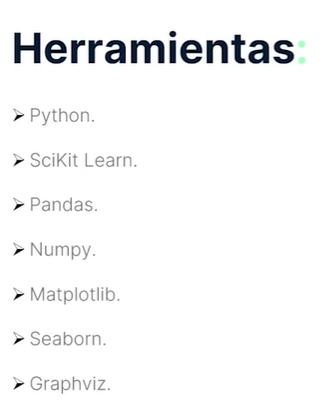

In [15]:
# Features 1= si y 0= no
#tiene el pelo largo?
#tiene las uñas afiladas?
#hace miau?

perro1= [0,1,1]
perro2= [1,0,1]
perro3= [1,1,1]

gato1= [0,1,0]
gato2= [0,1,1]
gato3= [1,1,0]

#datos
x_train = [perro1, perro2, perro3, gato1, gato2, gato3]
#clases
y_train = [1,1,1,0,0,0]# perro, perro, perro, gato, gato, gato

In [16]:
#modelo de aprendizaje de maquina que nos ayuda a encontrar una relacion lineal entre las variables
from sklearn.svm import LinearSVC
# SVC = Support Vector Classifier

## Libreria
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [17]:
model= LinearSVC()
model.fit(x_train, y_train)
#asi entreno el modelo

LinearSVC()

In [18]:
animal_misterioso= [1,1,1]
model.predict([animal_misterioso])
#aca estima q es un perro = 1

array([1])

In [19]:
misterio1 =[ 1,1,1]
misterio2 =[ 1,1,0]
misterio3 =[ 0,1,1]

#pruebas
x_test= [misterio1, misterio2, misterio3]
#clases pruebas
y_test= [0,1,1] # gato, perro, perro

In [20]:
previsiones = model.predict(x_test)
#aca el modelo acierta 1 de 3 ya q pata el modelo= perro, gato, perro

In [21]:
correctos = (previsiones == y_test).sum()
total = len(x_test)
tasa_de_acierto = correctos/total
print(f'La tasa de acierto fue de: { round(tasa_de_acierto*100, 2)}%')

La tasa de acierto fue de: 33.33%


In [22]:
#exactitud
from sklearn.metrics import accuracy_score

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: { round(tasa_de_acierto*100, 2)}%')

La tasa de acierto fue de: 33.33%


Francisco comenzó a estudiar aprendizaje de máquina (Machine Learning) en Alura, para en el futuro, trabajar como analista de datos. Él aprendió que, para que el aprendizaje de máquina sea eficiente, es necesario seguir un orden determinado para entrenar el modelo y después poder evaluar el desempeño de este.

1. Definir un modelo de entrenamiento.
2. Definir una lista de datos para entrenamiento y otra lista de datos para test.
3. Entrenar el modelo con base en los datos de entrenamiento.
4. evaluarlo con los datos de test.

### Ejercicio página web

In [23]:
import pandas as pd
datos= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning/dataset.csv', sep= ',')
datos.sample(5)

,home,how_it_works,contact,bought
89,1,0,1,1
47,1,0,1,1
58,1,0,1,1
31,1,0,1,1
51,1,1,0,0


In [24]:
mapa= {
    'home':'principal',
    'how_it_works':'como_funciona',
    'contact':'contacto',
    'bought':'compro',
}

datos = datos. rename(columns= mapa)
datos.sample(5)

,principal,como_funciona,contacto,compro
37,0,0,1,0
85,1,1,0,0
82,0,0,1,0
27,1,0,1,1
30,0,1,0,0


In [25]:
x =datos[['principal', 'como_funciona', 'contacto']]
x.head()

,principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [26]:
y = datos.compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [27]:
datos.shape

(99, 4)

### Entrenamiento y testeo

In [28]:
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [29]:
print(f'Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos')

Entrenaremos con 75 elementos y probaremos con 24 elementos


In [30]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model= LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: { round(tasa_de_acierto*100, 2)}%')

La tasa de acierto fue de: 95.83%


Biblioteca que facilita el proceso

Con mas accuracy

Con un factor de aletoriedad, en este caso con un SEED= 42

In [32]:
from sklearn.model_selection import train_test_split
SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)


model= LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: { round(tasa_de_acierto*100, 2)}%')

La tasa de acierto fue de: 96.0%
